<a href="https://colab.research.google.com/github/Nargis45/feature_selection/blob/main/select_features_using_information_gain_for__classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mounting the drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#providing the path of the file and storing the data in dataset and pandas library is used to study the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine_data.csv')

In [6]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.shape

(178, 14)

In [8]:
df['Class'].unique()

array([1, 2, 3])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop(labels=['Class'], axis=1), df['Class'], test_size=0.3, random_state=0)

In [12]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [22]:
from sklearn.feature_selection import mutual_info_classif # mutual info classifier
#detemine the mutual information
mutual_info=mutual_info_classif(X_train, y_train)
mutual_info

array([0.42034601, 0.30100068, 0.15536912, 0.2399611 , 0.20016581,
       0.47149627, 0.71638768, 0.13733057, 0.26538916, 0.62523917,
       0.55439079, 0.55259365, 0.55120495])

In [23]:
mutual_info=pd.Series(mutual_info)
mutual_info


0     0.420346
1     0.301001
2     0.155369
3     0.239961
4     0.200166
5     0.471496
6     0.716388
7     0.137331
8     0.265389
9     0.625239
10    0.554391
11    0.552594
12    0.551205
dtype: float64

In [24]:
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids                      0.716388
Color intensity                 0.625239
Hue                             0.554391
OD280/OD315 of diluted wines    0.552594
Proline                         0.551205
Total phenols                   0.471496
Alcohol                         0.420346
Malic acid                      0.301001
Proanthocyanins                 0.265389
Alcalinity of ash               0.239961
Magnesium                       0.200166
Ash                             0.155369
Nonflavanoid phenols            0.137331
dtype: float64

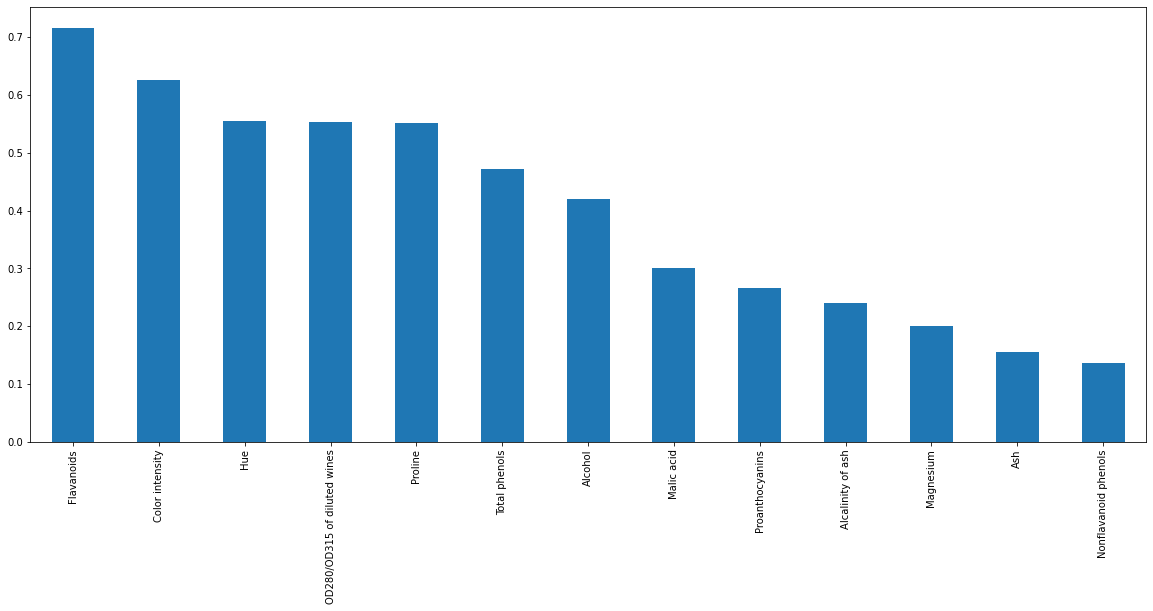

In [25]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [26]:
from sklearn.feature_selection import SelectKBest

In [28]:
#we will select the top 5 columns
sel_five_cols=SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train.fillna(0), y_train)
X_train.columns[sel_five_cols.get_support()] # get support gives indexes

Index(['Flavanoids', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Proline'],
      dtype='object')